In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tslearn.metrics import ctw_path, dtw
from tslearn.utils import to_time_series_dataset
from tslearn.barycenters import dtw_barycenter_averaging

In [6]:
current_dir = os.getcwd()
data_dir = 'ClassificationClusteringDatasets'

resource_dir = os.path.join(current_dir, data_dir)
files = os.listdir(resource_dir)
files = np.array([f for f in files if os.path.isfile(resource_dir+'/'+f)])
print(files, len(files))

['50words_TEST' '50words_TRAIN' 'Adiac_TEST' 'Adiac_TRAIN' 'Beef_TEST'
 'Beef_TRAIN' 'CBF_TEST' 'CBF_TRAIN' 'Coffee_TEST' 'Coffee_TRAIN'
 'ECG200_TEST' 'ECG200_TRAIN' 'FaceAll_TEST' 'FaceAll_TRAIN'
 'FaceFour_TEST' 'FaceFour_TRAIN' 'FISH_TEST' 'FISH_TRAIN'
 'Gun_Point_TEST' 'Gun_Point_TRAIN' 'Lightning2_TEST' 'Lightning2_TRAIN'
 'Lightning7_TEST' 'Lightning7_TRAIN' 'OliveOil_TEST' 'OliveOil_TRAIN'
 'OSULeaf_TEST' 'OSULeaf_TRAIN' 'SwedishLeaf_TEST' 'SwedishLeaf_TRAIN'
 'synthetic_control_TEST' 'synthetic_control_TRAIN' 'Trace_TEST'
 'Trace_TRAIN' 'Two_Patterns_TEST' 'Two_Patterns_TRAIN' 'wafer_TEST'
 'wafer_TRAIN' 'yoga_TEST' 'yoga_TRAIN'] 40


In [7]:
dataset = dict()
total_data_count = 0

for i in range(len(files)):
    dataset_name = '_'.join(name for name in files[i].split('_')[0:-1])
    if dataset_name not in dataset:
        dataset[dataset_name] = dict()

    file_path = os.path.join(resource_dir, files[i])
    file = open(file_path, "r")
    data = file.readlines()
    file.close()
    data = [[float(d) for d in time_series.strip().split(' ') if d != ""] for time_series in data]

    for time_series in data:
        total_data_count += 1
        label, series = time_series[0], time_series[1:]
        if label not in dataset[dataset_name]:
            dataset[dataset_name].update({label: [series]})
        else:
            dataset[dataset_name][label].append(series)
total_data_count

23999

In [8]:
read_data_count = 0
for set_name in dataset.keys():
    for l in dataset[set_name]:
        read_data_count += len(dataset[set_name][l])
print("Does the program read data successfully?", read_data_count==total_data_count)

Does the program read data successfully? True


In [9]:
# Define a modified dtw barycenter averaging
def ctw_barycenter_averaging(X, max_iter=100, tol=1e-5):
    X_ = to_time_series_dataset(X)
    sz, d = X_.shape[1:]
      
    # Initial average sequence
    C = np.mean(X_, axis=0)
    # Initial cost
    cost_prev = np.inf

    for it in range(max_iter):
        S = [[] for _ in range(sz)]
        for i, ts in enumerate(X_):
            optimal_path, _, D = ctw_path(C, ts)
            for path in optimal_path:
                i, j = path
                S[i].append(ts[j])
        C = np.zeros((sz, d))
        for i, s in enumerate(S):
            if len(s) > 0:
                C[i] = np.mean(s, axis=0)
            else:
                C[i] = C[i - 1]
        if np.abs(cost_prev - D) < tol:
            print(f"BREAK!! at iteration {it}")
            break
        cost_prev = D
    return C

def intraclass_inertia(centroid, time_series):
    # Compute DTW distances between cluster data and centroid
    distances = [dtw(x, centroid) for x in time_series]
    # Sum the distances to get the within-cluster sum of squares
    return sum(distances)

## 50words Dataset

In [14]:
set_name = "50words"
fiftyWord = dataset[set_name]
fiftyWord.keys()

dict_keys([4.0, 12.0, 13.0, 23.0, 27.0, 1.0, 22.0, 7.0, 9.0, 43.0, 8.0, 3.0, 2.0, 6.0, 24.0, 15.0, 11.0, 16.0, 10.0, 5.0, 33.0, 42.0, 30.0, 14.0, 29.0, 48.0, 40.0, 41.0, 45.0, 34.0, 26.0, 31.0, 28.0, 17.0, 19.0, 25.0, 39.0, 18.0, 21.0, 49.0, 37.0, 35.0, 46.0, 38.0, 20.0, 50.0, 32.0, 47.0, 36.0, 44.0])

In [16]:
# Compute the DTW barycenter averaging
averaging = dict()
for cluster in fiftyWord.keys():
    averaging[cluster] = dtw_barycenter_averaging(fiftyWord[cluster])

In [34]:
# Computer the intraclass inertia
intraclass = dict()
for cluster in fiftyWord.keys():
    intraclass[cluster] = intraclass_inertia(centroid=averaging[cluster], time_series=fiftyWord[cluster])

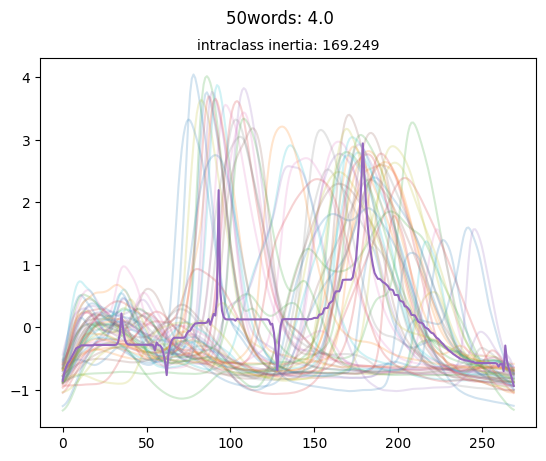

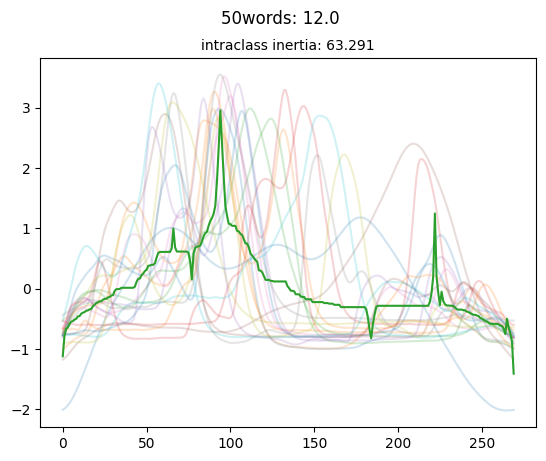

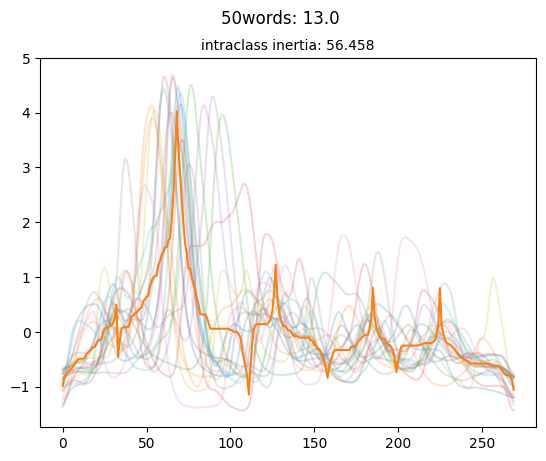

In [33]:
# Visualize the first 3 clusters
for cluster in list(fiftyWord.keys())[:3]:
    for s in fiftyWord[cluster]:
        plt.plot(s, alpha=.2)
    plt.plot(averaging[cluster])
    plt.suptitle(f"{set_name}: {cluster}")
    plt.title(f"intraclass inertia: {round(intraclass[cluster], 3)}", fontsize=10)
    plt.show()

In [35]:
# Compute the CTW barycenter averaging
ctw_averaging = dict()
for cluster in fiftyWord.keys():
    ctw_averaging[cluster] = ctw_barycenter_averaging(fiftyWord[cluster])

BREAK!! at iteration 26
BREAK!! at iteration 15
BREAK!! at iteration 28
BREAK!! at iteration 22
BREAK!! at iteration 20
BREAK!! at iteration 32
BREAK!! at iteration 24
BREAK!! at iteration 55
BREAK!! at iteration 52
BREAK!! at iteration 70
BREAK!! at iteration 79
BREAK!! at iteration 31
BREAK!! at iteration 20
BREAK!! at iteration 24
BREAK!! at iteration 30
BREAK!! at iteration 17
BREAK!! at iteration 55
BREAK!! at iteration 28
BREAK!! at iteration 47
BREAK!! at iteration 29
BREAK!! at iteration 36
BREAK!! at iteration 30
BREAK!! at iteration 39
BREAK!! at iteration 21
BREAK!! at iteration 13
BREAK!! at iteration 15
BREAK!! at iteration 14
BREAK!! at iteration 81
BREAK!! at iteration 33
BREAK!! at iteration 21
BREAK!! at iteration 34
BREAK!! at iteration 47
BREAK!! at iteration 21
BREAK!! at iteration 18
BREAK!! at iteration 33
BREAK!! at iteration 18
BREAK!! at iteration 32
BREAK!! at iteration 79
BREAK!! at iteration 21
BREAK!! at iteration 15
BREAK!! at iteration 14
BREAK!! at itera

In [39]:
# Computer the intraclass inertia
ctw_intraclass = dict()
for cluster in fiftyWord.keys():
    ctw_intraclass[cluster] = intraclass_inertia(centroid=ctw_averaging[cluster], time_series=fiftyWord[cluster])

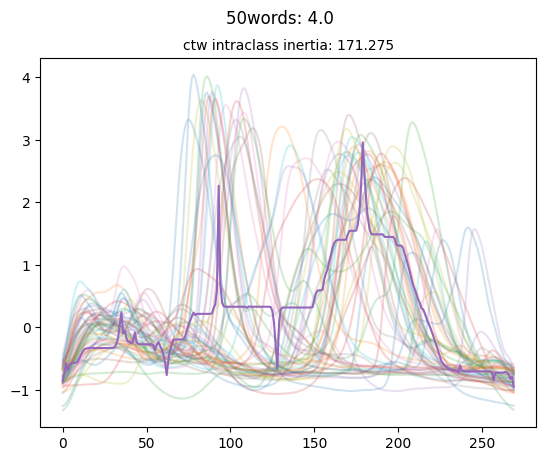

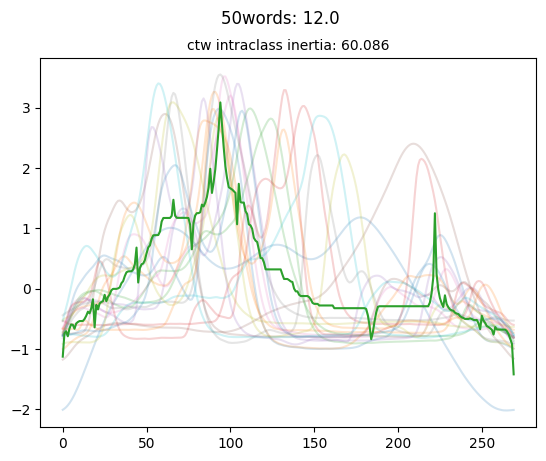

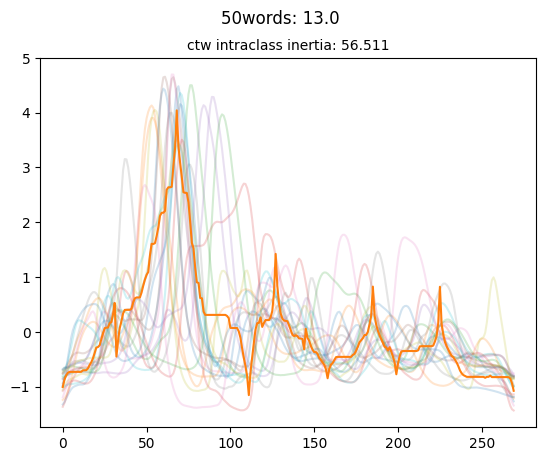

In [40]:
# Visualize the first 3 clusters
for cluster in list(fiftyWord.keys())[:3]:
    for s in fiftyWord[cluster]:
        plt.plot(s, alpha=.2)
    plt.plot(ctw_averaging[cluster])
    plt.suptitle(f"{set_name}: {cluster}")
    plt.title(f"ctw intraclass inertia: {round(ctw_intraclass[cluster], 3)}", fontsize=10)
    plt.show()

# test

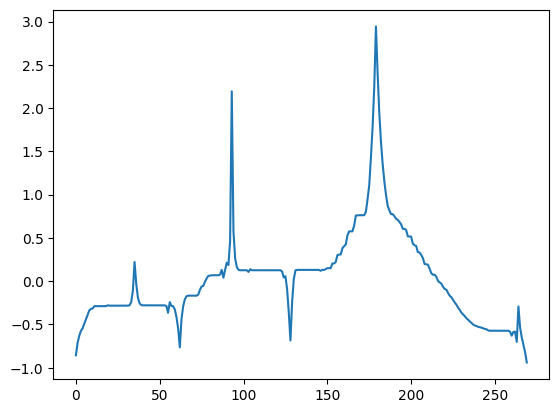

In [27]:
plt.plot(dtw_barycenter_averaging(fiftyWord_4))
plt.show()

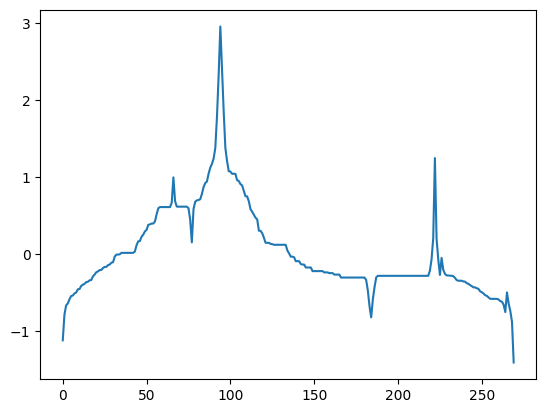

In [28]:
plt.plot(dtw_barycenter_averaging(fiftyWord_12))
plt.show()

In [32]:
trace = dataset['Trace']
print(fiftyWord.keys(), len(fiftyWord.keys()))

dict_keys([3.0, 1.0, 2.0, 4.0]) 4


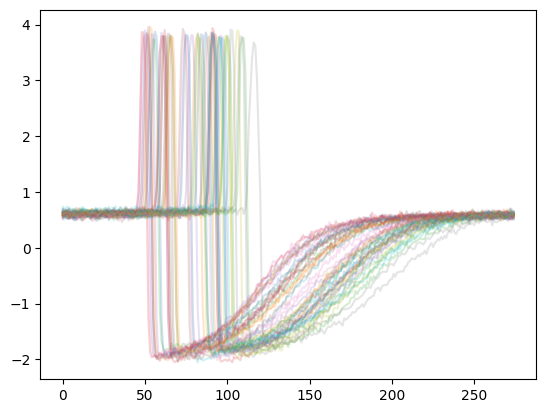

In [40]:
trace_2 = trace[1.0]
for s in trace_2:
    plt.plot(s, alpha=.2)
plt.show()

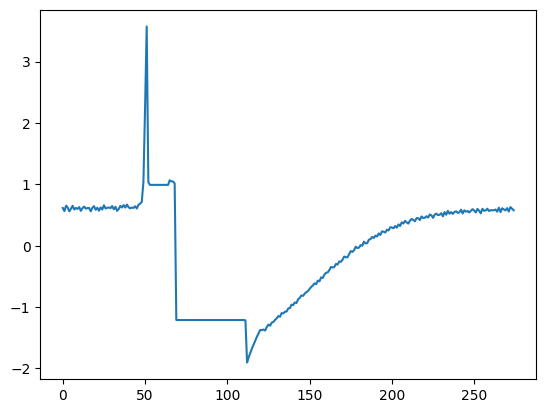

In [54]:
plt.plot(dtw_barycenter_averaging(trace_2, max_iter=100))
plt.show()

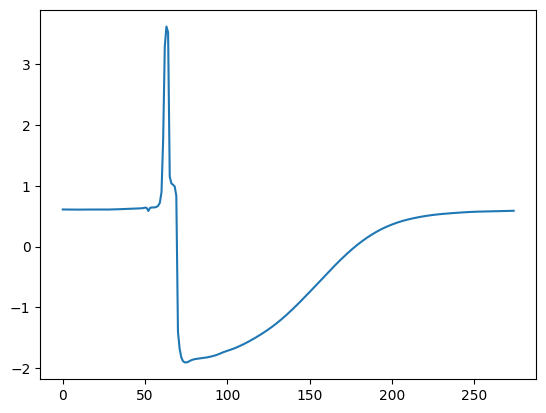

In [43]:
plt.plot(softdtw_barycenter(trace_2))
plt.show()

In [39]:
file_path = os.path.join(resource_dir, files[0])
file = open(file_path, "r")
data = file.readlines()
file.close()
# data = [d.strip() for d in data]
data = np.array([[float(d) for d in time_series.strip().split(' ') if d != ""] for time_series in data])
data

array([[ 4.        , -0.8909419 , -0.86099477, ..., -0.9194184 ,
        -0.93017828, -0.93938957],
       [12.        , -0.78346205, -0.68561749, ..., -0.96623282,
        -0.98049795, -0.99177639],
       [13.        , -1.3255684 , -1.284301  , ..., -1.1368405 ,
        -1.1979657 , -1.2699682 ],
       ...,
       [25.        , -1.1053955 , -1.0897564 , ..., -0.99401827,
        -1.0461744 , -1.0878249 ],
       [15.        , -1.5496778 , -1.4996599 , ..., -1.5721602 ,
        -1.5654099 , -1.55735   ],
       [16.        , -1.1383294 , -1.1175451 , ..., -0.99576816,
        -1.050867  , -1.1040808 ]])

In [32]:
dataset = dict()
dataset['test'] = {'1': [[1,2,3,4,5]]}
dataset['test']['1'].append([6,7,8,9,10])
dataset

{'test': {'1': [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]}}